In [56]:
import tool_kit as tk
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
msft = pd.read_csv('data/MSFT.csv',parse_dates=['Date'],index_col=0)
msft = msft[['Adj Close','Volume']].rename(columns={'Adj Close':'msft_price','Volume':'msft_volume'})
visa = pd.read_csv('data/V.csv',parse_dates=['Date'],index_col=0)
visa = visa[['Adj Close','Volume']].rename(columns={'Adj Close':'visa_price','Volume':'visa_volume'})
amzn = pd.read_csv('data/AMZN.csv',parse_dates=['Date'],index_col=0)
amzn = amzn[['Adj Close','Volume']].rename(columns={'Adj Close':'amzn_price','Volume':'amzn_volume'})
example = pd.concat([msft,amzn,visa],axis=1)
example  = example.resample('M').last()
#example.to_csv('example.csv')

In [58]:
df = pd.read_csv('data/example.csv',parse_dates=['Date'],index_col=0)
cols = list(df.columns)
df

,msft_price,msft_volume,amzn_price,amzn_volume,visa_price,visa_volume
Date,,,,,,
2017-01-31,59.552139,25270500,41.174000,62744000,79.475830,7479400
2017-02-28,59.292274,23239800,42.251999,55874000,84.662178,8521900
2017-03-31,61.034527,21040300,44.327000,79152000,85.557533,6429800
2017-04-30,63.444027,39548800,46.249500,147294000,87.819946,6888500
2017-05-31,65.093895,30436400,49.730999,78262000,91.843155,9866000
...,...,...,...,...,...,...
2022-08-31,260.735199,24791800,126.769997,53648700,198.266846,6559000
2022-09-30,232.245483,35694800,113.000000,59479600,177.253799,9472300
2022-10-31,231.477661,28357300,102.440002,99251400,206.697998,8674100


In [59]:
rets = []
for i in ['msft_price','amzn_price','visa_price']:
    col = "{}_ret".format(i)
    df[col] = df[i].pct_change() 
    rets.append(col)
df = df.dropna()
df

,msft_price,msft_volume,amzn_price,amzn_volume,visa_price,visa_volume,msft_price_ret,amzn_price_ret,visa_price_ret
Date,,,,,,,,,
2017-02-28,59.292274,23239800,42.251999,55874000,84.662178,8521900,-0.004364,0.026182,0.065257
2017-03-31,61.034527,21040300,44.327000,79152000,85.557533,6429800,0.029384,0.049110,0.010576
2017-04-30,63.444027,39548800,46.249500,147294000,87.819946,6888500,0.039478,0.043371,0.026443
2017-05-31,65.093895,30436400,49.730999,78262000,91.843155,9866000,0.026005,0.075276,0.045812
2017-06-30,64.245743,24161100,48.400002,67806000,90.444725,9036600,-0.013030,-0.026764,-0.015226
...,...,...,...,...,...,...,...,...,...
2022-08-31,260.735199,24791800,126.769997,53648700,198.266846,6559000,-0.066663,-0.060615,-0.061515
2022-09-30,232.245483,35694800,113.000000,59479600,177.253799,9472300,-0.109267,-0.108622,-0.105984
2022-10-31,231.477661,28357300,102.440002,99251400,206.697998,8674100,-0.003306,-0.093451,0.166113


In [60]:
tk.skewness(df[rets])

array([-0.01628913,  0.2763516 , -0.06291512])

In [61]:
tk.kurtosis(df[rets])

array([-0.26097588,  1.02439562, -0.40107173])

In [62]:
tk.compound(df[rets])

msft_price_ret    3.027059
amzn_price_ret    1.040122
visa_price_ret    1.614128
dtype: float64

In [63]:
tk.annualize_rets(df[rets],periods_per_year=12)

msft_price_ret    0.265469
amzn_price_ret    0.128071
visa_price_ret    0.176343
dtype: float64

In [64]:
tk.annualize_vol(df[rets],periods_per_year=12)

msft_price_ret    0.205337
amzn_price_ret    0.322762
visa_price_ret    0.222438
dtype: float64

In [65]:
tk.sharpe_ratio(df[rets],riskfree_rate=0.04,periods_per_year=12)

msft_price_ret    1.059202
amzn_price_ret    0.262709
visa_price_ret    0.591017
dtype: float64

In [66]:
tk.is_normal(df[rets],level=0.01)

msft_price_ret    True
amzn_price_ret    True
visa_price_ret    True
dtype: bool

In [67]:
tk.drawdown(df['amzn_price_ret'])

,Wealth,Previous Peak,Drawdown
Date,,,
2017-02-28,1026.181547,1026.181547,0.000000
2017-03-31,1076.577452,1076.577452,0.000000
2017-04-30,1123.269539,1123.269539,0.000000
2017-05-31,1207.825302,1207.825302,0.000000
2017-06-30,1175.499150,1207.825302,-0.026764
...,...,...,...
2022-08-31,3078.884660,4258.840530,-0.277060
2022-09-30,2744.450381,4258.840530,-0.355587
2022-10-31,2487.977899,4258.840530,-0.415809


Text(0.5, 1.0, 'Drawdown')

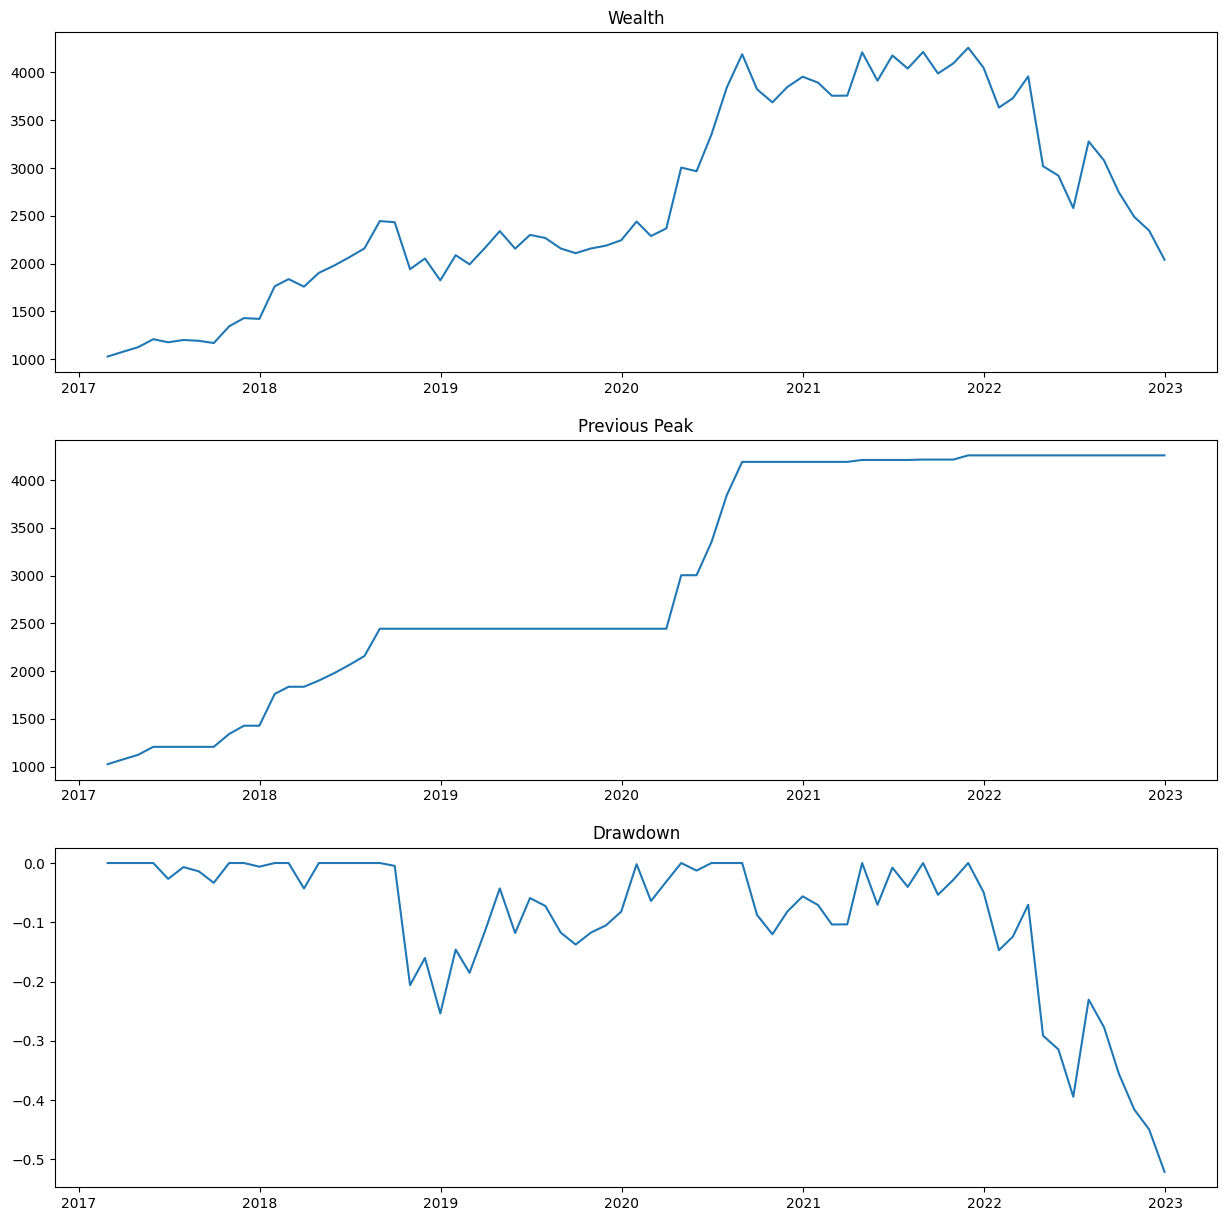

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,1,figsize=(15,15))
ax[0].plot(tk.drawdown(df['amzn_price_ret'])['Wealth'])
ax[0].set_title('Wealth')
ax[1].plot(tk.drawdown(df['amzn_price_ret'])['Previous Peak'])
ax[1].set_title('Previous Peak')
ax[2].plot(tk.drawdown(df['amzn_price_ret'])['Drawdown'])
ax[2].set_title('Drawdown')


In [69]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).min()

For Amazon


Wealth           1026.181547
Previous Peak    1026.181547
Drawdown           -0.520968
dtype: float64

In [70]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).max()

For Amazon


Wealth           4258.84053
Previous Peak    4258.84053
Drawdown            0.00000
dtype: float64

In [71]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).idxmax()

For Amazon


Wealth          2021-11-30
Previous Peak   2021-11-30
Drawdown        2017-02-28
dtype: datetime64[ns]

In [72]:
print('For Amazon')
tk.drawdown(df['amzn_price_ret']).idxmin()

For Amazon


Wealth          2017-02-28
Previous Peak   2017-02-28
Drawdown        2022-12-31
dtype: datetime64[ns]

In [73]:
tk.semideviation(df[rets])

msft_price_ret    0.031989
amzn_price_ret    0.053398
visa_price_ret    0.033944
dtype: float64

In [74]:
tk.var_historic(df[rets],level=5)

msft_price_ret    0.071371
amzn_price_ret    0.113904
visa_price_ret    0.088243
dtype: float64

In [75]:
tk.cvar_historic(df[rets],level=5)

msft_price_ret    0.092131
amzn_price_ret    0.171518
visa_price_ret    0.106836
dtype: float64

In [76]:
tk.var_gaussian(df[rets],level=5)

msft_price_ret    0.075294
amzn_price_ret    0.137871
visa_price_ret    0.089232
dtype: float64

In [77]:
tk.var_gaussian(df[rets],level=5,modified=True)

msft_price_ret    0.079439
amzn_price_ret    0.134160
visa_price_ret    0.094744
dtype: float64

<AxesSubplot: title={'center': 'Different VaR at 5%'}>

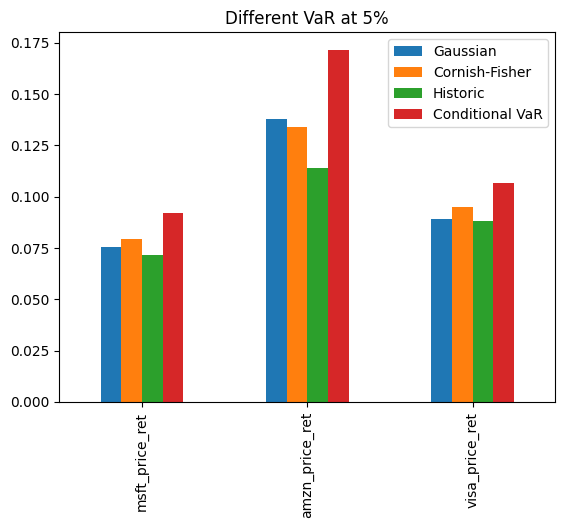

In [78]:
var_table = [tk.var_gaussian(df[rets]), 
             tk.var_gaussian(df[rets], modified=True), 
             tk.var_historic(df[rets]),
             tk.cvar_historic(df[rets])]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic','Conditional VaR']
comparison.plot.bar(title= "Different VaR at 5%")

In [79]:
ew = np.repeat(1/3,3)
er = tk.annualize_rets(df[rets],len(df))
tk.portfolio_return(ew,er)

1.8937699789008926

In [80]:
cov = df[rets].cov()
tk.portfolio_vol(ew,cov)

0.06112919569886498

<AxesSubplot: xlabel='Volatility'>

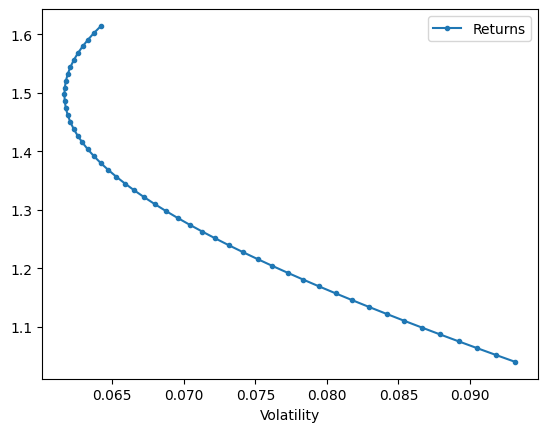

In [81]:
l = ['amzn_price_ret','visa_price_ret']
tk.plot_ef2(50,er[l].values,cov.loc[l,l].values)

In [82]:
weights_optimum = tk.minimize_vol(5, er[l], cov.loc[l,l])
vol = tk.portfolio_vol(weights_optimum, cov.loc[l,l])
vol

0.0641535256792044

In [83]:
weights_optimum

array([0.40639771, 0.59360229])

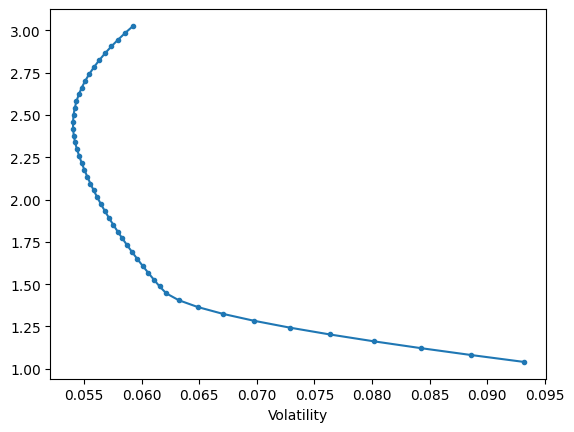

In [84]:
tk.plot_ef(50,er.values,cov.values)

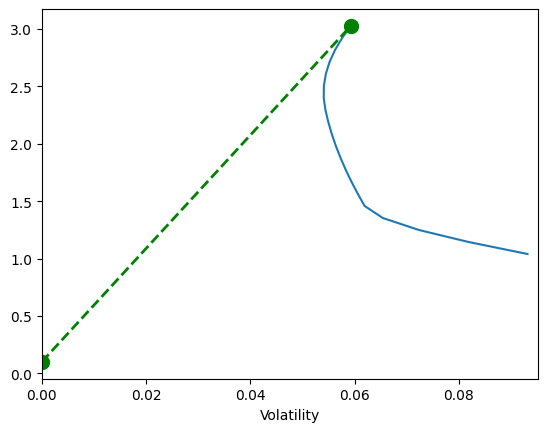

In [85]:
tk.plot_ef(20, er, cov, style='-', show_cml=True, riskfree_rate=0.1)

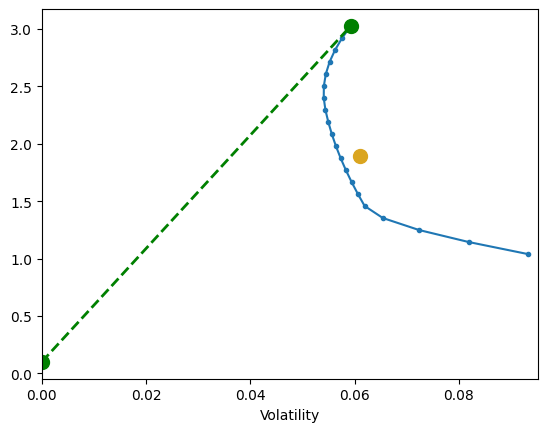

In [86]:
tk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<AxesSubplot: xlabel='Volatility'>

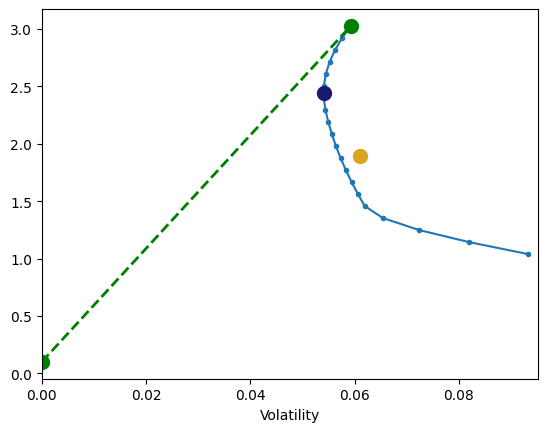

In [87]:
tk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

<AxesSubplot: xlabel='Date'>

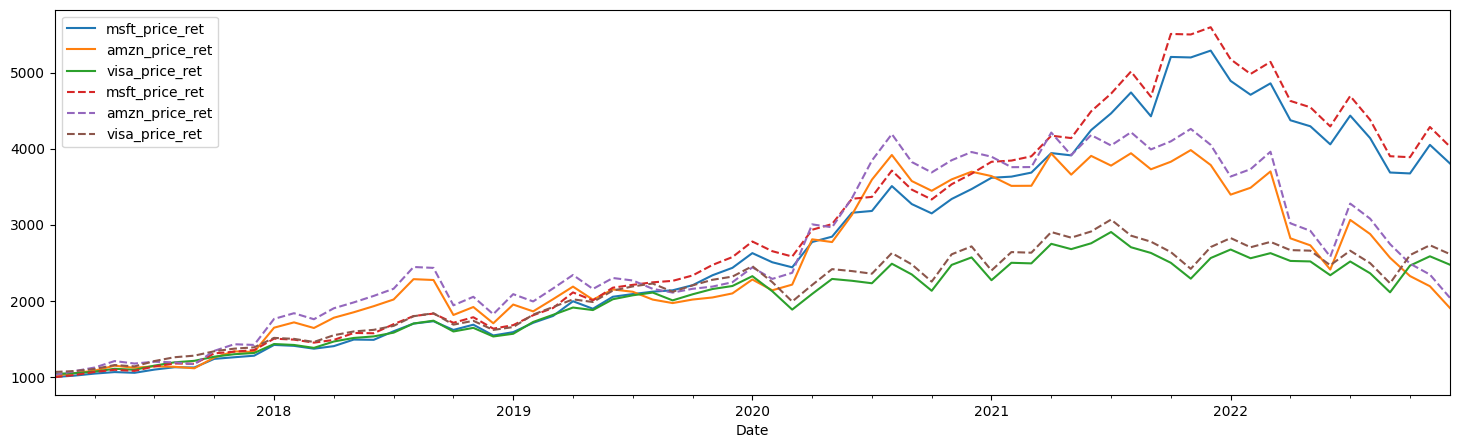

In [88]:
btr = tk.run_cppi(df[rets])
ax = btr["Wealth"].plot(figsize=(18,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [89]:
tk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
msft_price_ret,0.257850,0.204731,-0.015687,-0.241872,0.079621,0.092131,1.083134,-0.305285
amzn_price_ret,0.113813,0.322550,0.293621,1.070206,0.134566,0.171518,0.252505,-0.520968
visa_price_ret,0.160197,0.222318,-0.019781,-0.369571,0.095026,0.106836,0.569762,-0.272889


<AxesSubplot: xlabel='Date'>

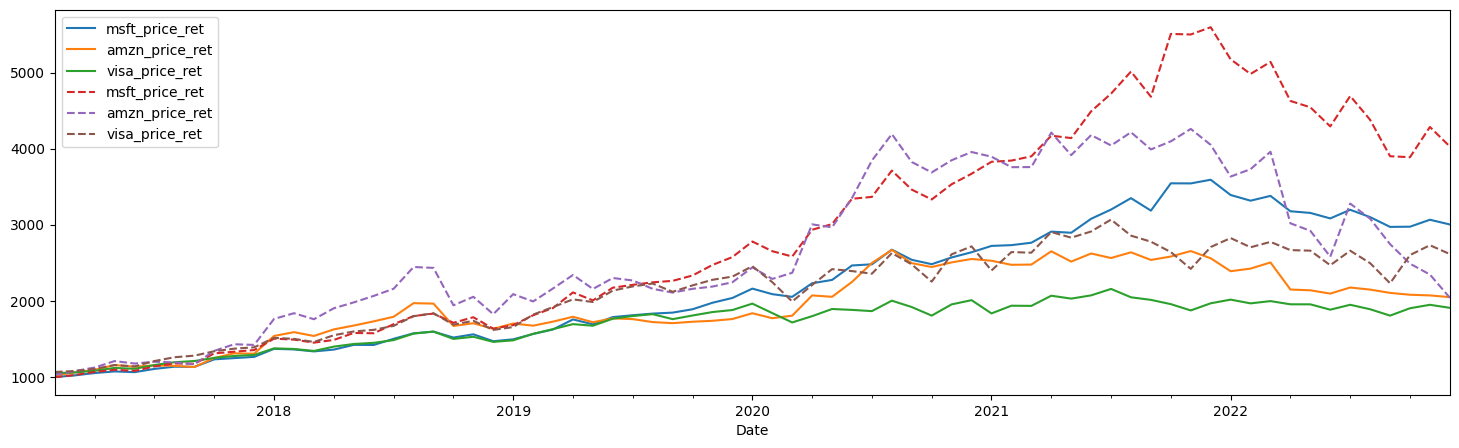

In [90]:
btr = tk.run_cppi(df[rets],drawdown=0.25)
ax = btr["Wealth"].plot(figsize=(18,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [91]:
tk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
msft_price_ret,0.207989,0.135518,0.045939,-0.360436,0.049399,0.055896,1.278336,-0.172579
amzn_price_ret,0.126895,0.184094,0.115130,2.193291,0.074521,0.105784,0.512078,-0.232351
visa_price_ret,0.107843,0.133417,-0.397907,-0.568977,0.060558,0.069361,0.567732,-0.162731


In [92]:
tk.gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100,prices=True)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,93.658463,104.428359,108.382161,102.562958,100.302289,109.286216,95.222730,99.667018,97.750852,103.065942,...,102.025530,108.274510,97.944010,100.470280,94.715227,101.090836,91.713115,98.400744,100.016033,116.724179
2,90.462636,106.042339,111.632246,97.132107,96.507923,115.707250,97.076436,97.981885,97.844316,103.512826,...,100.652050,104.074967,97.034678,100.656166,92.632720,108.479224,94.376045,99.508186,99.965168,109.816280
3,89.453558,110.179714,115.491883,102.012830,100.331927,116.044175,95.290846,98.614462,99.791090,110.527564,...,101.165280,104.327608,96.477917,90.247047,91.792224,106.844170,91.833843,103.259717,98.971208,108.748394
4,97.774470,118.341231,117.336289,96.942909,97.491359,113.972627,94.353796,102.075826,103.472521,118.103125,...,102.708011,97.424332,91.840816,80.800167,99.870745,115.220268,94.952672,94.901352,105.619013,114.390907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,150.319641,502.337812,210.257072,175.884164,251.758187,268.951297,92.347812,278.868462,733.476757,200.919714,...,115.479437,143.209711,245.540736,231.904038,193.452018,89.833798,89.457993,233.957444,369.124755,89.927976
117,154.136732,514.937015,205.643336,178.367378,245.730218,281.912907,93.966661,280.069000,774.978682,201.135329,...,120.011802,140.164820,239.373658,231.182209,189.685250,86.647300,92.741889,234.040770,354.170830,93.452698
118,149.858170,508.579788,212.045802,181.065386,249.543931,268.082152,93.277420,261.851536,818.974005,188.232134,...,126.371203,145.258049,255.142263,210.374787,186.812563,84.721684,86.456135,236.773914,336.000105,88.892596
119,147.627291,531.455314,204.486328,195.191775,269.356352,285.009256,99.846984,273.972725,814.676750,199.090368,...,116.644509,153.793736,239.729144,205.897671,189.334497,82.965896,91.455783,229.421054,339.197941,89.493290


<AxesSubplot: >

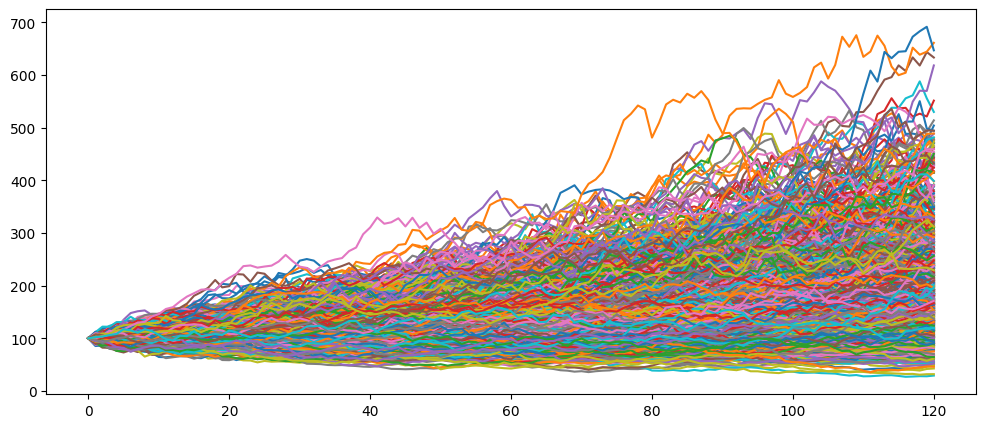

In [93]:
tk.gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100,prices=True).plot(figsize=(12,5), legend=False)

In [94]:
tk.gbm(n_years=10,n_scenarios=1000,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100,prices=True).iloc[-1].mean(), 100*1.07**10

(197.83389823130156, 196.71513572895665)

In [95]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
tk.pv(liabilities,0.03)

0    6.23332
dtype: float64

<AxesSubplot: >

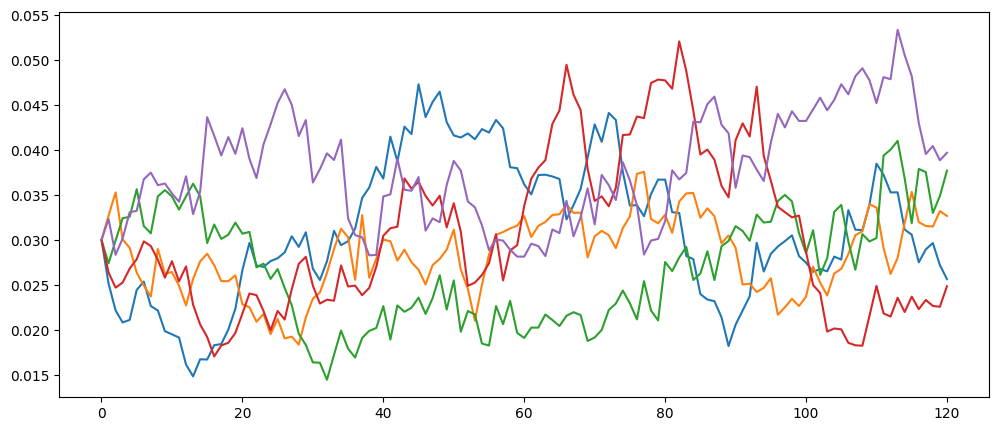

In [96]:
tk.cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5)[0].plot(legend=False, figsize=(12,5))

<AxesSubplot: >

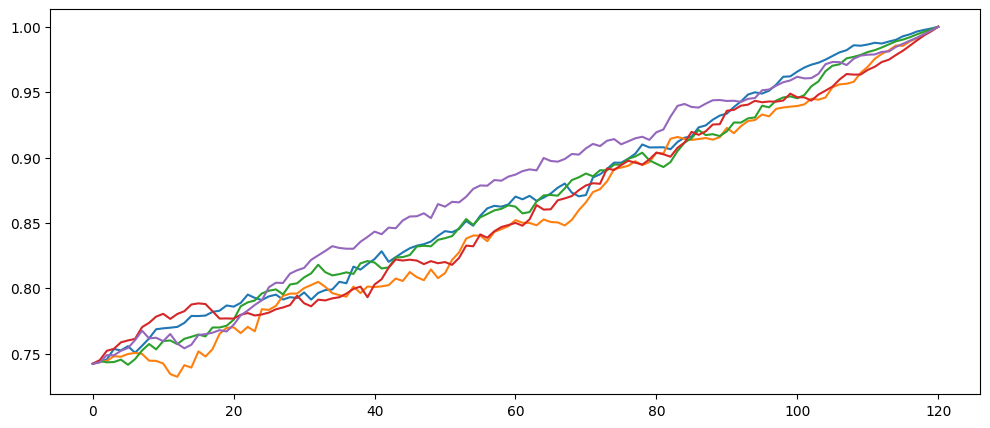

In [97]:
tk.cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5)[1].plot(legend=False, figsize=(12,5))

In [98]:
tk.bond_price(20, 1000, 0.05, 2, 0.04)

0    1136.777396
dtype: float64

In [99]:
tk.macaulay_duration(tk.bond_cash_flows(3, 1000, .06, 2), 0.06/2)

5.579707187194534

In [100]:
short_bond = tk.bond_cash_flows(10, 1000, .05, 1)
long_bond = tk.bond_cash_flows(20, 1000, .05, 1)
w_s = tk.match_durations(liabilities, short_bond, long_bond, 0.04)
w_s

1.7981931628121175

<AxesSubplot: >

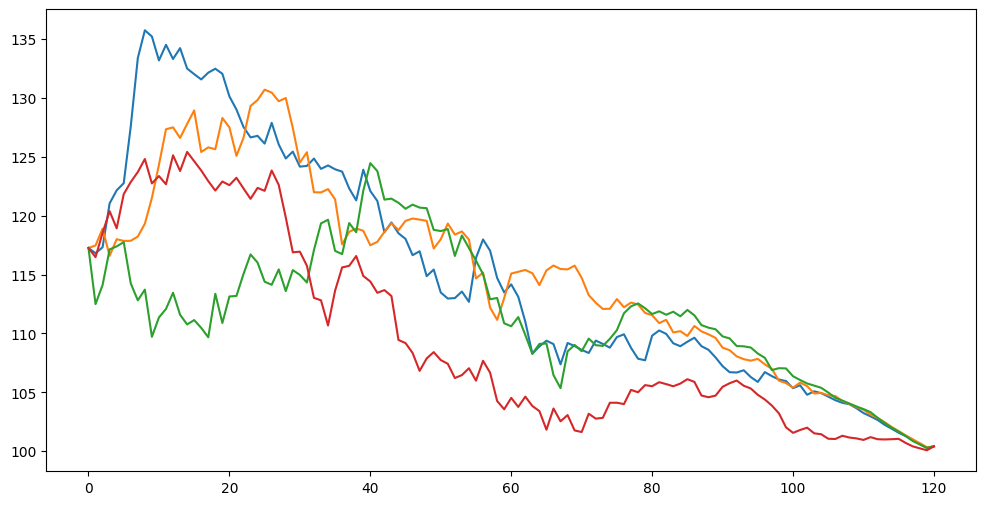

In [101]:
rates, zc_prices = tk.cir(10, 500, b=0.03, r_0 = 0.03)
tk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]]).plot(legend=False, figsize=(12,6))

In [102]:
p = tk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = tk.bond_total_return(p, 100, .05, 12)
tk.annualize_rets(btr, 12)

1    0.028596
2    0.028496
3    0.029726
4    0.030729
dtype: object

In [103]:
rates, zc_prices = tk.cir(10, 500, b=0.03, r_0 = 0.03)
price_10 = tk.bond_price(10, 100, .05, 12, rates)
price_30 = tk.bond_price(30, 100, .05, 12, rates)
rets_30 = tk.bond_total_return(price_30, 100, .05, 12)
rets_10 = tk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = tk.bt_mix(rets_10, rets_30, allocator=tk.fixedmix_allocator, w1=.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
tk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.035676,0.004334,-0.351986,1.615901,-0.00072,-0.000164,1.274453,-0.002104


In [104]:
price_eq = tk.gbm(n_years=10,n_scenarios=500,mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [105]:
rets_7030b = tk.bt_mix(rets_eq, rets_bonds, allocator=tk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis='columns')
tk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.061505,0.005129,0.379909,0.375492,-0.002647,-0.002178,5.97858,0.0


In [106]:
rets_g8020 = tk.bt_mix(rets_eq, rets_bonds, allocator=tk.glidepath_allocator, start_glide=.8, end_glide=.2)
pd.concat([tk.terminal_stats(rets_bonds, name="FI"), 
           tk.terminal_stats(rets_eq, name="Eq"),
           tk.terminal_stats(rets_7030b, name="70/30"),
           tk.terminal_stats(rets_g8020, name="Glide 80 to 20")],
          axis=1)

,FI,Eq,70/30,Glide 80 to 20
mean,1.381414,2.044882,1.822729,1.686995
std,0.111891,1.090639,0.659677,0.459739
p_breach,NaN,0.054000,0.014000,0.006000
e_short,NaN,0.119672,0.063812,0.047924
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [107]:
n_scenarios =  5000
rates, zc_prices = tk.cir(10, n_scenarios=n_scenarios, b=0.03, r_0 = 0.03, sigma=0.02)
price_eq = tk.gbm(n_years=10,n_scenarios=n_scenarios, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = tk.bt_mix(rets_eq, rets_zc, allocator=tk.fixedmix_allocator, w1=0.7)
rets_floor75 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, floor=.75,  zc_prices=zc_prices[1:])
rets_floor75m1 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=1)
rets_floor75m5 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=5)
rets_floor75m10 = tk.bt_mix(rets_eq, rets_zc, allocator=tk.floor_allocator, zc_prices=zc_prices[1:], floor=.75, m=10)
pd.concat([tk.terminal_stats(rets_zc, name="ZC", floor=0.75), 
           tk.terminal_stats(rets_eq, name="Eq", floor=0.75),
           tk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
           tk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
           tk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
           tk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
           tk.terminal_stats(rets_floor75m10, name="Floor75m10", floor=0.75)
          ],
          axis=1).round(2)

,ZC,Eq,70/30,Floor75,Floor75m1,Floor75m5,Floor75m10
mean,1.34,1.96,1.75,1.94,1.62,1.95,1.95
std,0.00,0.97,0.59,0.97,0.43,0.97,0.97
p_breach,NaN,0.03,0.01,NaN,NaN,NaN,0.02
e_short,NaN,0.13,0.06,NaN,NaN,NaN,0.01
p_reach,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


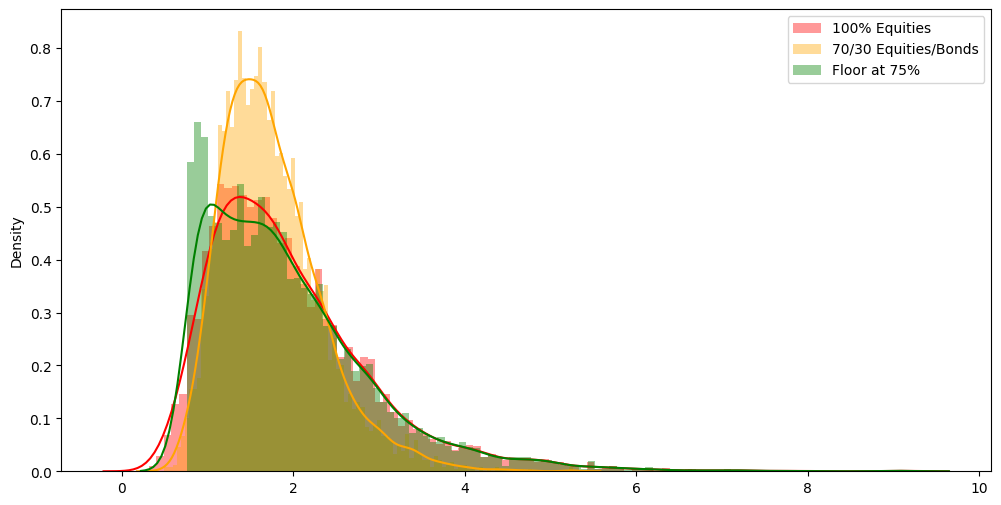

In [108]:
tv_eq = tk.terminal_values(rets_eq)
tv_zc = tk.terminal_values(rets_zc)
tv_7030b = tk.terminal_values(rets_7030b)
tv_floor75 = tk.terminal_values(rets_floor75)
tv_floor75m1 = tk.terminal_values(rets_floor75m1)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.distplot(tv_eq, color="red", label="100% Equities", bins=100)
#sns.distplot(tv_zc, color="blue", label="100% Immunized Bonds")
sns.distplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100)
sns.distplot(tv_floor75, color="green", label="Floor at 75%", bins=100)

plt.legend();

In [110]:
brka_d = pd.read_csv("data/brka_d_ret.csv", parse_dates=True, index_col=0)
brka_m = brka_d.resample('M').apply(tk.compound).to_period('M')
fff = tk.get_fff_returns()
brka_excess = brka_m["1990":"2012-05"] - fff.loc["1990":"2012-05", ['RF']].values
mkt_excess = fff.loc["1990":"2012-05",['Mkt-RF']]

In [111]:
result = tk.regress(brka_excess, mkt_excess, alpha = False)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   BRKA   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.158
Method:                 Least Squares   F-statistic:                              51.42
Date:                Sat, 21 Jan 2023   Prob (F-statistic):                    7.26e-12
Time:                        09:36:16   Log-Likelihood:                          386.94
No. Observations:                 269   AIC:                                     -771.9
Df Residuals:                     268   BIC:                                     -768.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5552      0.077      7.171      0.000       0.403       0.708
==============================================================================
Omnibus:                       45.593   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.925
Skew:                           0.825   Prob(JB):                     7.37e-23
Kurtosis:                       5.524   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
result = tk.regress(brka_excess, mkt_excess, alpha = True)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BRKA   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     48.45
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           2.62e-11
Time:                        09:36:17   Log-Likelihood:                 388.47
No. Observations:                 269   AIC:                            -772.9
Df Residuals:                     267   BIC:                            -765.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5402      0.078      6.961      0.000       0.387       0.693
Alpha          0.0061      0.004      1.744      0.082      -0.001       0.013
==============================================================================
Omnibus:                       45.698   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.573
Skew:                           0.825   Prob(JB):                     5.33e-23
Kurtosis:                       5.535   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: >

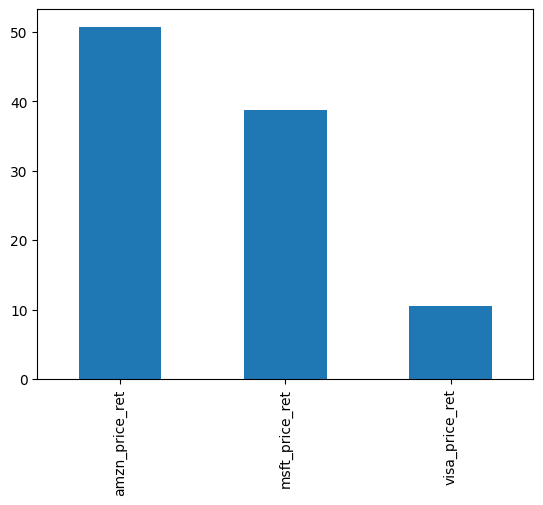

In [113]:
mgr_r = 0.3*df["msft_price_ret"] + .5*df["amzn_price_ret"] + 0.2*np.random.normal(scale=0.15/(12**.5), size=df[['msft_price_ret','amzn_price_ret','visa_price_ret']].shape[0])
weights = tk.style_analysis(mgr_r, df[['msft_price_ret','amzn_price_ret','visa_price_ret']])*100
weights.sort_values(ascending=False).head(6).plot.bar()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.123629,0.160821,-0.757144,3.645047,0.074304,0.103955,0.566462,-0.528292
EW-Tethered,0.125138,0.157023,-0.753469,3.172937,0.072621,0.100742,0.589532,-0.530536
CW,0.119928,0.147692,-0.716176,2.550756,0.068298,0.095105,0.592466,-0.515999


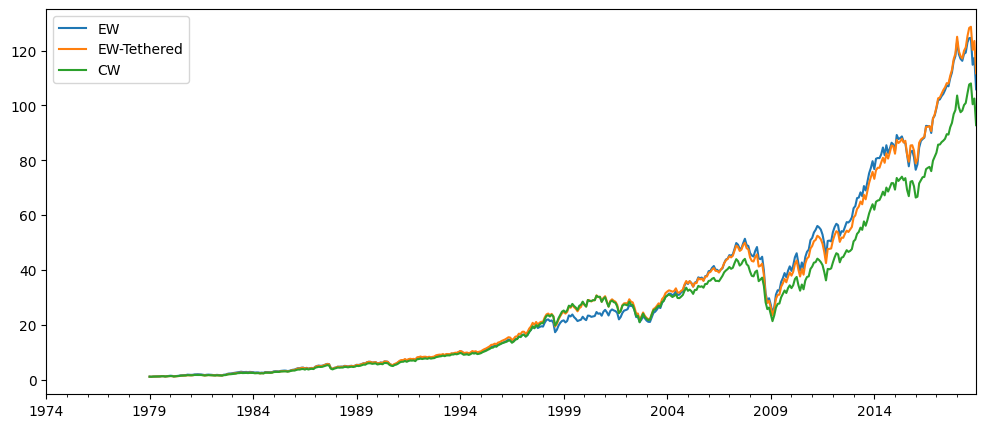

In [114]:
ind49_rets = tk.get_ind_returns(weighting="vw", n_inds=49)["1974":]
ind49_mcap = tk.get_ind_market_caps(49, weights=True)["1974":]
ewr = tk.backtest_ws(ind49_rets)
ewtr = tk.backtest_ws(ind49_rets, cap_weights=ind49_mcap, max_cw_mult=5, microcap_threshold=.005)
cwr = tk.backtest_ws(ind49_rets, weighting=tk.weight_cw, cap_weights=ind49_mcap)
btr = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,5))
tk.summary_stats(btr.dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.131606,0.187437,-0.616296,3.771301,0.085308,0.122226,0.527384,-0.598060
CW,0.131522,0.187236,-0.544912,2.820495,0.085244,0.120151,0.527515,-0.587850
GMV-Sample,0.153093,0.116303,-0.811404,3.408589,0.049705,0.072557,1.030062,-0.463912
GMV-CC,0.132374,0.115347,-0.890923,3.072378,0.051622,0.075267,0.863733,-0.524097
GMV-Shrink 0.5,0.138502,0.114873,-0.886391,3.305898,0.050722,0.074239,0.919236,-0.518444


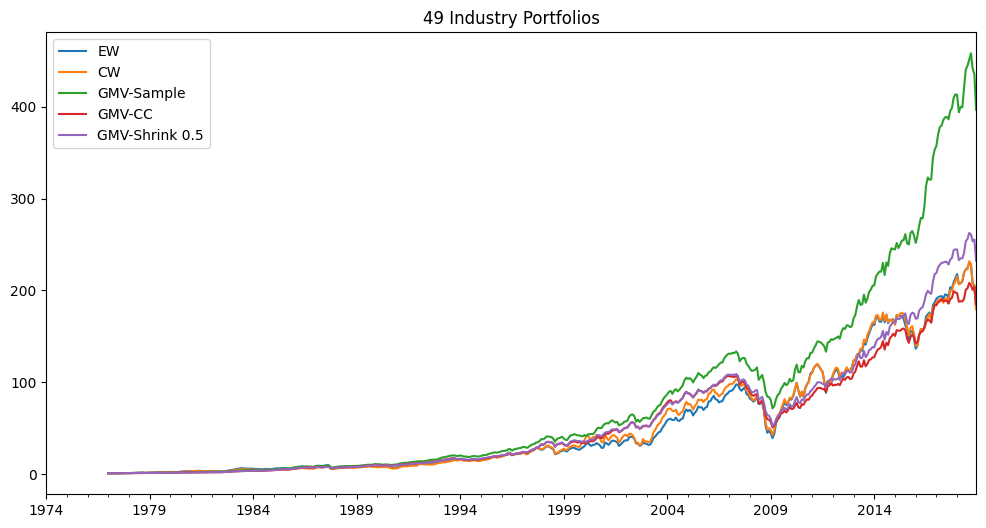

In [116]:
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
ind_rets = tk.get_ind_returns(weighting="ew", n_inds=49)["1974":]
ind_mcap = tk.get_ind_market_caps(49, weights=True)["1974":]
ewr = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_ew)
cwr = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_cw, cap_weights=ind_mcap)
mv_s_r = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_gmv, cov_estimator=tk.sample_cov)
mv_cc_r = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_gmv, cov_estimator=tk.cc_cov)
mv_sh_r = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_gmv, cov_estimator=tk.shrinkage_cov, delta=0.5)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.5': mv_sh_r})
(1+btr).cumprod().plot(figsize=(12,6), title="49 Industry Portfolios")
tk.summary_stats(btr.dropna())


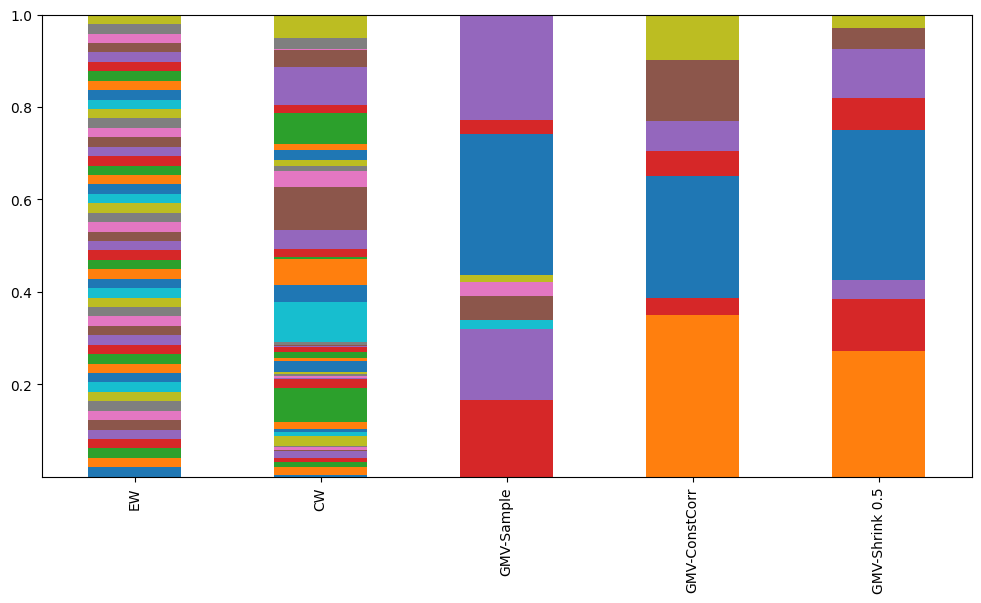

In [117]:
wts = pd.DataFrame({
    "EW": tk.weight_ew(ind_rets["2013":]),
    "CW": tk.weight_cw(ind_rets["2013":], cap_weights=ind_mcap),
    "GMV-Sample": tk.weight_gmv(ind_rets["2013":], cov_estimator=tk.sample_cov),
    "GMV-ConstCorr": tk.weight_gmv(ind_rets["2013":], cov_estimator=tk.cc_cov),
    "GMV-Shrink 0.5": tk.weight_gmv(ind_rets["2013":], cov_estimator=tk.shrinkage_cov),
})
wts.T.plot.bar(stacked=True, figsize=(12,6), legend=False);

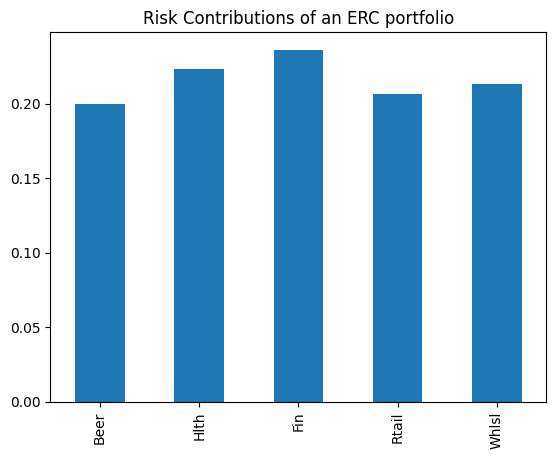

In [118]:
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
inds=['Beer', 'Hlth', 'Fin','Rtail','Whlsl']
ind_rets = tk.get_ind_returns(weighting="vw", n_inds=49)["1974":]
ind_mcap = tk.get_ind_market_caps(49, weights=True)["1974":]
rets = ind_rets["2013":][inds]
cov = rets.cov()

tk.risk_contribution(tk.weight_ew(rets), cov).plot.bar(title="Risk Contributions of an EW portfolio");
tk.risk_contribution(tk.equal_risk_contributions(cov), cov).plot.bar(title="Risk Contributions of an ERC portfolio");

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.121052,0.161000,-0.769256,3.572680,0.074804,0.103950,0.550248,-0.528292
CW,0.117028,0.149425,-0.703895,2.444447,0.069378,0.096505,0.566698,-0.518418
ERC-Sample,0.120185,0.149185,-0.872577,4.019237,0.069491,0.096357,0.588203,-0.502950


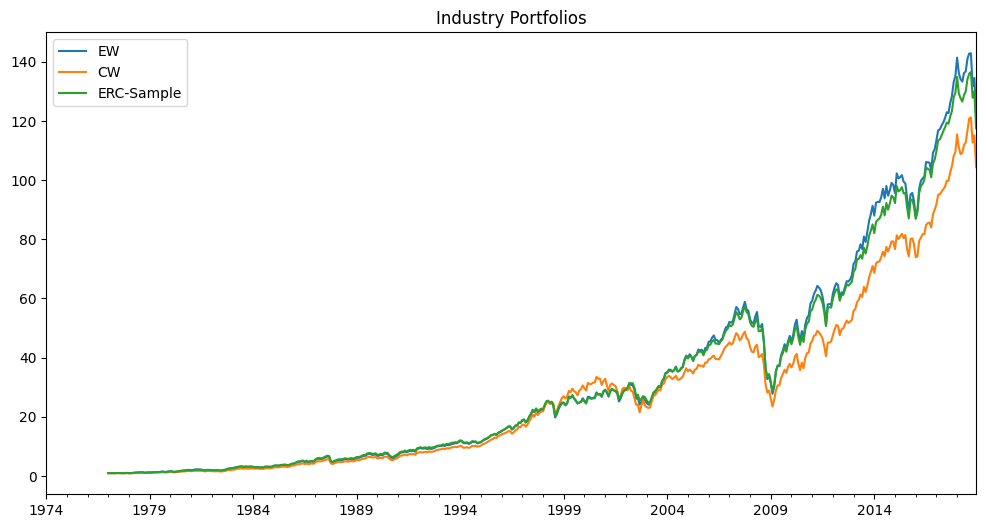

In [119]:
ewr = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_ew)
cwr = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_cw, cap_weights=ind_mcap)
mv_erc_r = tk.backtest_ws(ind_rets, estimation_window=36, weighting=tk.weight_erc, cov_estimator=tk.sample_cov)
btr = pd.DataFrame({"EW": ewr, "CW": cwr, "ERC-Sample": mv_erc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
tk.summary_stats(btr.dropna())